In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv("data/answers_clean_complete.csv")
df_all = df_all.drop('Unnamed: 0', axis=1)
df_all = df_all.iloc[2:].reset_index(drop=True)

In [3]:
df = df_all[[ 'role', 'PR_comments', 'PR_comments_kind', 'PR_comments_count_tests',
       'PR_comments_count_code_quality', 'PR_comments_count_defect',
       'PR_comments_kind_other', 'reviewers', 'CR_checklist',
       'CR_checklist_location', 'PR_checks', 'PR_checks_type',
       'PR_checks_type_other', 'how_CR_helps']]

In [4]:
count_all = df.shape[0]
contributors = df['role'] == 'Source code contributor'
maintainers = df['role'] != 'Source code contributor'
count_contributors = df[contributors].shape[0]
count_maintainers = df[maintainers].shape[0]

In [5]:
print('No answer:', df['PR_comments'].isna().sum())
print((df['PR_comments'].isna().sum()) * 100 / count_all)
print('Answer:', count_all - df['PR_comments'].isna().sum() )
print((count_all - df['PR_comments'].isna().sum()) * 100 / count_all)
print('-----')
print('Contributors:')
print(df[contributors]['PR_comments'].isna().sum() * 100 / count_contributors)
print(df[contributors]['PR_comments'].isna().sum())
print('-----')
print('Maintainers:')
print(df[maintainers]['PR_comments'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['PR_comments'].isna().sum())

No answer: 42
8.9171974522293
Answer: 429
91.0828025477707
-----
Contributors:
10.695187165775401
20
-----
Maintainers:
7.746478873239437
22


In [6]:
print(df[contributors]['PR_comments'].isna().sum())
print(count_contributors - df[contributors]['PR_comments'].isna().sum())
# print(df[contributors].PR_comments.value_counts())
print('-----')
print(df[maintainers]['PR_comments'].isna().sum())
print(count_maintainers - df[maintainers]['PR_comments'].isna().sum())
# print(df[maintainers].PR_comments.value_counts())

20
167
-----
22
262


In [7]:
# df[~df["PR_comments"].isna()][['PR_comments']].to_csv("manual_data_inspection/PR_comments.csv")
data = pd.read_excel('manual_data_inspection/PR_comments_inspected.xlsx')
invalid_indexes = data[data['invalid'] == 1]['Column1'].astype(int).tolist()
zero_indexes = data[data['zero'] == 1]['Column1'].astype(int).tolist()
donno_indexes = data[data["I don\'t know"] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])
print('---')
print(df[df.index.isin(zero_indexes) & (contributors)].shape[0])
print(df[df.index.isin(zero_indexes) & (maintainers)].shape[0])
print('---')
print(df[df.index.isin(donno_indexes) & (contributors)].shape[0])
print(df[df.index.isin(donno_indexes) & (maintainers)].shape[0])

15
27
---
19
35
---
2
4


In [8]:
print('No answer:', df['PR_comments_kind'].isna().sum())
print((df['PR_comments_kind'].isna().sum()) * 100 / count_all)
print('Answer:', count_all - df['PR_comments_kind'].isna().sum() )
print((count_all - df['PR_comments_kind'].isna().sum()) * 100 / count_all)
print('-----')
print('Contributors:')
print(df[contributors]['PR_comments_kind'].isna().sum() * 100 / count_contributors)
print(df[contributors]['PR_comments_kind'].isna().sum())
print('-----')
print('Maintainers:')
print(df[maintainers]['PR_comments_kind'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['PR_comments_kind'].isna().sum())

No answer: 84
17.8343949044586
Answer: 387
82.1656050955414
-----
Contributors:
17.647058823529413
33
-----
Maintainers:
17.95774647887324
51


In [9]:
print(df[contributors]['PR_comments_kind'].isna().sum())
print(count_contributors - df[contributors]['PR_comments_kind'].isna().sum())
# print(df[contributors].PR_comments.value_counts())
print('-----')
print(df[maintainers]['PR_comments_kind'].isna().sum())
print(count_maintainers - df[maintainers]['PR_comments_kind'].isna().sum())
# print(df[maintainers].PR_comments.value_counts())

33
154
-----
51
233


In [10]:
df['PR_comments_test'] = df['PR_comments_kind'].apply(lambda x: True if 'Tests' in str(x) else False)
df['PR_comments_code_quality'] = df['PR_comments_kind'].apply(lambda x: True if 'Code quality or maintainability' in str(x) else False)
df['PR_comments_functional'] = df['PR_comments_kind'].apply(lambda x: True if 'Functional' in str(x) else False)
df['PR_comments_other'] = df['PR_comments_kind'].apply(lambda x: True if 'Other' in str(x) else False)

<ipython-input-10-01fff4f67f60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PR_comments_test'] = df['PR_comments_kind'].apply(lambda x: True if 'Tests' in str(x) else False)
<ipython-input-10-01fff4f67f60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PR_comments_code_quality'] = df['PR_comments_kind'].apply(lambda x: True if 'Code quality or maintainability' in str(x) else False)
<ipython-input-10-01fff4f67f60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

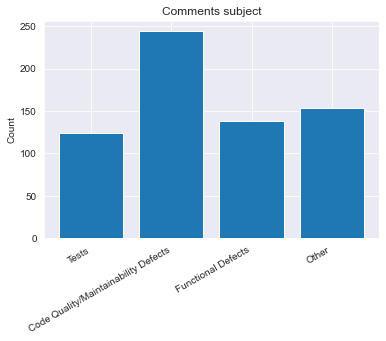

Number of not-answered: 84
Number of answered: 387


In [11]:
test_kinds = ['Tests', 'Code Quality/Maintainability Defects', 'Functional Defects', 'Other']
counts = [df.PR_comments_test.sum(), df.PR_comments_code_quality.sum(), df.PR_comments_functional.sum(), df.PR_comments_other.sum()]
fig, ax = plt.subplots()
ax.bar(test_kinds, counts)
ax.set_ylabel('Count')
ax.set_title('Comments subject')
plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.PR_comments_kind.isna().sum())
print("Number of answered:", df.shape[0] - df.PR_comments_kind.isna().sum())

In [12]:
print(df['PR_comments_test'].sum() * 100 / 387)
print(df['PR_comments_code_quality'].sum() * 100 / 387)
print(df['PR_comments_functional'].sum() * 100 / 387)
print(df['PR_comments_other'].sum() * 100 / 387)

32.041343669250644
63.049095607235145
35.65891472868217
39.53488372093023


In [13]:
data = pd.read_excel('manual_data_inspection/PR_comments_counts_inspected.xlsx')
data2 = pd.read_excel('manual_data_inspection/PR_comments_kind_other_coding.xlsx')
print(data.columns)
print(data2.columns)

Index(['Column1', 'PR_comments_count_tests', 'PR_comments_count_tests_boxplot',
       'PR_comments_count_code_quality',
       'PR_comments_count_code_quality_boxplot', 'PR_comments_count_defect',
       'PR_comments_count_defect_boxplot'],
      dtype='object')
Index(['Column1', 'PR_comments_kind_other', 'Count', 'Use for boxplot'], dtype='object')


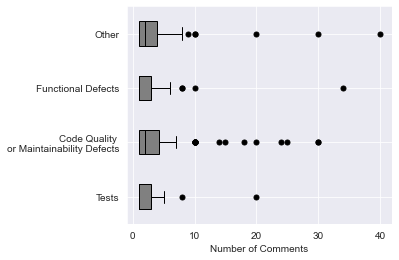

In [14]:
column1 = 'PR_comments_count_tests_boxplot'
column2 = 'PR_comments_count_code_quality_boxplot'
column3 = 'PR_comments_count_defect_boxplot'
column4 = 'Use for boxplot'

fig, ax = plt.subplots()

# Create a list of the column values
column_values = [data[column1].dropna(), data[column2].dropna(), data[column3].dropna(), data2[column4].dropna()]
# Create the box plots
boxplot = ax.boxplot(column_values, vert=False, patch_artist=True,
                     boxprops=dict(facecolor='gray'),  # Change the box color
                     capprops=dict(color='black'),  # Change the color of the caps
                     whiskerprops=dict(color='black'),  # Change the color of the whiskers
                     medianprops=dict(color='black'),  # Change the color of the median line
                     flierprops=dict(marker='o', markerfacecolor='black', markersize=5))  # Change the color and style of the outliers

# Set the title
# ax.set_title('Box Plots')dd

# Set the y-axis label
ax.set_xlabel('Number of Comments')
ax.set_yticklabels(['Tests', 'Code Quality \nor Maintainability Defects', 'Functional Defects', 'Other'])
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# for ax in axes:
#        ax.set_xticks([])
#        ax.set_xlabel('')
plt.subplots_adjust(left=0.285)
plt.savefig('figures/boxplot-comments-per-type.pdf', format='pdf', dpi=300)
plt.show()

In [15]:
new_df = pd.concat([data[column1].dropna(), data[column2].dropna(), data[column3].dropna(), data2[column4].dropna()], axis=1)

<ipython-input-16-a4deeb76575d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


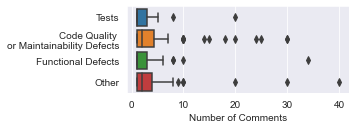

In [16]:
import seaborn as sns
sns.boxplot(data=new_df[[column1, column2, column3, column4]], orient="h")
axes = plt.axes()
axes.set_xlabel('Number of Comments')
axes.set_yticklabels(['Tests', 'Code Quality \nor Maintainability Defects', 'Functional Defects', 'Other'])
plt.subplots_adjust(left=0.285, right=0.8, top=0.9, bottom=0.6)
plt.savefig('figures/boxplot-comments-per-type.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

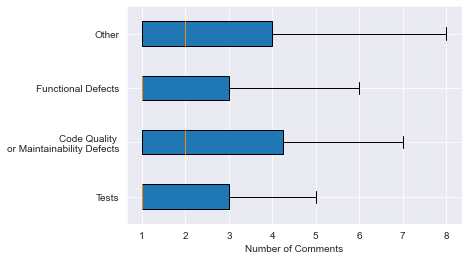

In [17]:
column1 = 'PR_comments_count_tests_boxplot'
column2 = 'PR_comments_count_code_quality_boxplot'
column3 = 'PR_comments_count_defect_boxplot'
column4 = 'Use for boxplot'

fig, ax = plt.subplots()

# Create a list of the column values
column_values = [data[column1].dropna(), data[column2].dropna(), data[column3].dropna(), data2[column4].dropna()]

# Create the box plots
boxplot = ax.boxplot(column_values, vert=False, patch_artist=True, showfliers=False)

ax.set_yticklabels(['Tests', 'Code Quality \nor Maintainability Defects', 'Functional Defects', 'Other'])

# Set the title
# ax.set_title('Box Plots')

# Set the y-axis label
ax.set_xlabel('Number of Comments')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# for ax in axes:
#        ax.set_xticks([])
#        ax.set_xlabel('')

plt.savefig('figures/boxplot-comments-per-type-no-outliers.pdf', format='pdf')

plt.show()

In [18]:
print(data[column1].shape[0] - data[column1].isnull().sum(),
      data[column2].shape[0] - data[column2].isnull().sum(),
      data[column3].shape[0] - data[column3].isnull().sum(),
      data2[column4].shape[0] - data2[column4].isnull().sum())

52 100 62 49


In [19]:
df[~df["PR_comments_kind_other"].isna()][['PR_comments_kind_other']].to_csv("manual_data_inspection/PR_comments_kind_other.csv")

In [20]:
df[(~df["PR_comments_count_tests"].isna()) | (~df["PR_comments_count_code_quality"].isna()) | (~df["PR_comments_count_defect"].isna())][['PR_comments_count_tests','PR_comments_count_code_quality', 'PR_comments_count_defect']].to_csv("manual_data_inspection/PR_comments_counts.csv")

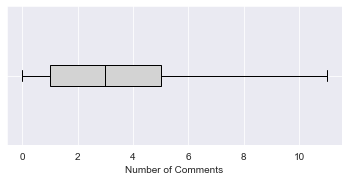

In [21]:
data = pd.read_excel('manual_data_inspection/PR_comments_inspected.xlsx')
fig, ax = plt.subplots()

# Specify the column containing the values for the box plot
column_name = 'Use for box plot'

# Create the box plot
boxplot = ax.boxplot(data[column_name].dropna(), showfliers=False, vert=False,
                     patch_artist=True)  # Enable patch artist

# Set box colors
box_color = 'lightgray'
for box in boxplot['boxes']:
    box.set(facecolor=box_color)  # Set facecolor for each box patch

# Set color properties for other elements
for element in ['caps', 'whiskers', 'medians', 'fliers']:
    for line in boxplot[element]:
        line.set(color='black')  # Set color for each element

# Set marker properties for fliers
for flier in boxplot['fliers']:
    flier.set(marker='o', markerfacecolor='black', markersize=5)  # Set marker properties for fliers
# Set x-axis label and hide y-axis ticks
ax.set_xlabel('Number of Comments')
ax.set_yticklabels([])
ax.set_aspect(5)
# Save the figure as a PDF
plt.savefig('figures/boxplot-comments-per-pr.pdf', format='pdf')

# Show the plot
plt.show()

<ipython-input-22-ca6fcdbbb8fe>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


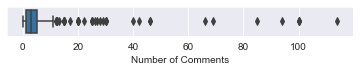

In [22]:
sns.boxplot(data=data[column_name].dropna(), orient="h")
axes = plt.axes()
axes.set_xlabel('Number of Comments')
axes.set_yticklabels([])
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.8)
plt.savefig('figures/boxplot-comments-per-pr.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
data = pd.read_excel('manual_data_inspection/PR_comments_inspected.xlsx')
print(data['Use for box plot'].isnull().sum())
print(data['Use for box plot'].shape[0] - 57)

50
373


In [24]:
data[data['Use for box plot'] == 0].shape[0]

54

In [25]:
data.head(3)

,Column1,PR_comments,exact,range,zero,>10,>20,>50,~100 and more,Use for box plot,invalid,I don't know
0,0.0,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
1,1.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
2,2.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [26]:
df.reviewers.value_counts()

1                217
2                132
More than 2       58
0                 51
I don't know.      7
Name: reviewers, dtype: int64

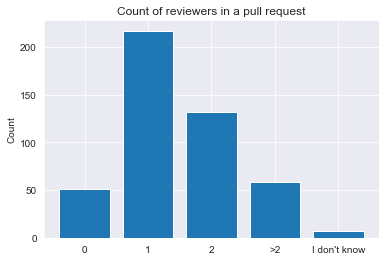

Number of not-answered: 6
Number of answered: 465


In [27]:
reviewers_count = ['0', '1', '2', '>2', "I don't know"]
counts = [df.reviewers.value_counts()['0'], df.reviewers.value_counts()['1'], df.reviewers.value_counts()['2'], df.reviewers.value_counts()['More than 2'], df.reviewers.value_counts()["I don't know."]]
fig, ax = plt.subplots()
ax.bar(reviewers_count, counts)
ax.set_ylabel('Count')
ax.set_title('Count of reviewers in a pull request')
# plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.reviewers.isna().sum())
print("Number of answered:", df.shape[0] - df.reviewers.isna().sum())

In [28]:
print(df[contributors]['reviewers'].isna().sum())
print(count_contributors - df[contributors]['reviewers'].isna().sum())
print(df[contributors].reviewers.value_counts())
print('-----')
print(df[maintainers]['reviewers'].isna().sum())
print(count_maintainers - df[maintainers]['reviewers'].isna().sum())
print(df[maintainers].reviewers.value_counts())

3
184
1                85
2                61
More than 2      27
0                 9
I don't know.     2
Name: reviewers, dtype: int64
-----
3
281
1                132
2                 71
0                 42
More than 2       31
I don't know.      5
Name: reviewers, dtype: int64


In [29]:
print(df.reviewers.value_counts()['0'] * 100 / 465)
print(df.reviewers.value_counts()['1'] * 100 / 465)
print(df.reviewers.value_counts()['2'] * 100 / 465)
print(df.reviewers.value_counts()['More than 2'] * 100 / 465)
print(df.reviewers.value_counts()["I don't know."] * 100 / 465)

10.96774193548387
46.666666666666664
28.387096774193548
12.473118279569892
1.5053763440860215


In [30]:
print('0 reviewers: ')
print(df[contributors].reviewers.value_counts()['0'] * 100 / count_contributors)
print(df[maintainers].reviewers.value_counts()['0'] * 100 / count_maintainers)

print('1 reviewers: ')
print(df[contributors].reviewers.value_counts()['1'] * 100 / count_contributors)
print(df[maintainers].reviewers.value_counts()['1'] * 100 / count_maintainers)

print('2 reviewers: ')
print(df[contributors].reviewers.value_counts()['2'] * 100 / count_contributors)
print(df[maintainers].reviewers.value_counts()['2'] * 100 / count_maintainers)

print('>2 reviewers: ')
print(df[contributors].reviewers.value_counts()['More than 2'] * 100 / count_contributors)
print(df[maintainers].reviewers.value_counts()['More than 2'] * 100 / count_maintainers)

print('Donno: ')
print(df[contributors].reviewers.value_counts()["I don't know."] * 100 / count_contributors)
print(df[maintainers].reviewers.value_counts()["I don't know."] * 100 / count_maintainers)

0 reviewers: 
4.81283422459893
14.788732394366198
1 reviewers: 
45.45454545454545
46.478873239436616
2 reviewers: 
32.62032085561497
25.0
>2 reviewers: 
14.438502673796792
10.915492957746478
Donno: 
1.0695187165775402
1.7605633802816902


In [31]:
df.CR_checklist.value_counts()

Yes (Please provide a link to it in the text box below):    234
No.                                                         167
Not aware of it.                                             64
Name: CR_checklist, dtype: int64

In [32]:
print(df[contributors]['CR_checklist'].isna().sum())
print(count_contributors - df[contributors]['CR_checklist'].isna().sum())
print(df[contributors].CR_checklist.value_counts())
print('-----')
print(df[maintainers]['CR_checklist'].isna().sum())
print(count_maintainers - df[maintainers]['CR_checklist'].isna().sum())
print(df[maintainers].CR_checklist.value_counts())

3
184
Yes (Please provide a link to it in the text box below):    101
Not aware of it.                                             47
No.                                                          36
Name: CR_checklist, dtype: int64
-----
3
281
Yes (Please provide a link to it in the text box below):    133
No.                                                         131
Not aware of it.                                             17
Name: CR_checklist, dtype: int64


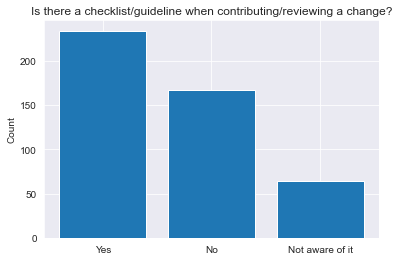

Number of not-answered: 6
Number of answered: 465


In [33]:
cr_checklist = ['Yes', 'No', 'Not aware of it']
counts = [df.CR_checklist.value_counts()[0], df.CR_checklist.value_counts()['No.'], df.CR_checklist.value_counts()['Not aware of it.']]
fig, ax = plt.subplots()
ax.bar(cr_checklist, counts)
ax.set_ylabel('Count')
ax.set_title('Is there a checklist/guideline when contributing/reviewing a change?')
# plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.CR_checklist.isna().sum())
print("Number of answered:", df.shape[0] - df.CR_checklist.isna().sum())

In [34]:
print('Yes: ')
print(df[contributors].CR_checklist.value_counts()[0] * 100 / count_contributors)
print(df[maintainers].CR_checklist.value_counts()[0] * 100 / count_maintainers)

print('No: ')
print(df[contributors].CR_checklist.value_counts()['No.'] * 100 / count_contributors)
print(df[maintainers].CR_checklist.value_counts()['No.'] * 100 / count_maintainers)

print('Not aware: ')
print(df[contributors].CR_checklist.value_counts()['Not aware of it.'] * 100 / count_contributors)
print(df[maintainers].CR_checklist.value_counts()['Not aware of it.'] * 100 / count_maintainers)

Yes: 
54.01069518716577
46.83098591549296
No: 
19.25133689839572
46.12676056338028
Not aware: 
25.13368983957219
5.985915492957746


In [35]:
print(df.CR_checklist.value_counts()[0] * 100 / 465)
print(df.CR_checklist.value_counts()['No.'] * 100 / 465)
print(df.CR_checklist.value_counts()['Not aware of it.'] * 100 / 465)

50.32258064516129
35.913978494623656
13.763440860215054


In [36]:
df[~df['CR_checklist_location'].isna()][['CR_checklist_location']].to_csv("manual_data_inspection/PR_checklist_location.csv")

In [37]:
df.loc[df.PR_checks == '1', 'PR_checks'] = None
df.PR_checks.value_counts()

/Users/alikhatami/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Yes                     322
No.                      80
I'm not aware of it.     65
Name: PR_checks, dtype: int64

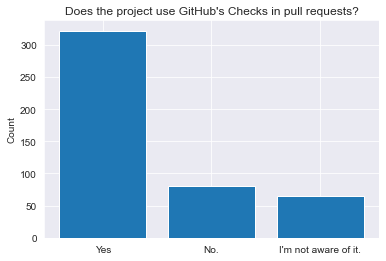

Number of not-answered: 4
Number of answered: 467


In [38]:
cr_checklist = ['Yes', 'No.', "I'm not aware of it."]
counts = [df.PR_checks.value_counts()['Yes'], df.PR_checks.value_counts()['No.'], df.PR_checks.value_counts()["I'm not aware of it."]]
fig, ax = plt.subplots()
ax.bar(cr_checklist, counts)
ax.set_ylabel('Count')
ax.set_title("Does the project use GitHub's Checks in pull requests?")
# plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.PR_checks.isna().sum())
print("Number of answered:", df.shape[0] - df.PR_checks.isna().sum())

In [39]:
print('Yes: ')
print(df[contributors].PR_checks.value_counts()['Yes'] * 100 / count_contributors)
print(df[maintainers].PR_checks.value_counts()['Yes'] * 100 / count_maintainers)

print('No: ')
print(df[contributors].PR_checks.value_counts()['No.'] * 100 / count_contributors)
print(df[maintainers].PR_checks.value_counts()['No.'] * 100 / count_maintainers)

print('Not aware: ')
print(df[contributors].PR_checks.value_counts()["I'm not aware of it."] * 100 / count_contributors)
print(df[maintainers].PR_checks.value_counts()["I'm not aware of it."] * 100 / count_maintainers)

Yes: 
67.37967914438502
69.01408450704226
No: 
12.29946524064171
20.070422535211268
Not aware: 
19.78609625668449
9.859154929577464


In [40]:
print(df.PR_checks.value_counts()['Yes'] * 100 / 467)
print(df.PR_checks.value_counts()['No.'] * 100 / 467)
print(df.PR_checks.value_counts()["I'm not aware of it."] * 100 / 467)

68.95074946466809
17.130620985010708
13.9186295503212


In [41]:
print(df[contributors]['PR_checks'].isna().sum())
print(count_contributors - df[contributors]['PR_checks'].isna().sum())
print(df[contributors].PR_checks.value_counts())
print('-----')
print(df[maintainers]['PR_checks'].isna().sum())
print(count_maintainers - df[maintainers]['PR_checks'].isna().sum())
print(df[maintainers].PR_checks.value_counts())

1
186
Yes                     126
I'm not aware of it.     37
No.                      23
Name: PR_checks, dtype: int64
-----
3
281
Yes                     196
No.                      57
I'm not aware of it.     28
Name: PR_checks, dtype: int64


In [42]:
df['PR_checks_type_quality'] = df['PR_checks_type'].apply(lambda x: True if 'quality' in str(x) else False)
df['PR_checks_type_coverage'] = df['PR_checks_type'].apply(lambda x: True if 'coverage' in str(x) else False)
df['PR_checks_type_build'] = df['PR_checks_type'].apply(lambda x: True if 'Build' in str(x) else False)
df['PR_checks_type_test'] = df['PR_checks_type'].apply(lambda x: True if 'Test' in str(x) else False)
df['PR_checks_type_other_choice'] = df['PR_checks_type'].apply(lambda x: True if 'Other' in str(x) else False)

<ipython-input-42-9123a7325229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PR_checks_type_quality'] = df['PR_checks_type'].apply(lambda x: True if 'quality' in str(x) else False)
<ipython-input-42-9123a7325229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PR_checks_type_coverage'] = df['PR_checks_type'].apply(lambda x: True if 'coverage' in str(x) else False)
<ipython-input-42-9123a7325229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [43]:
print(df['PR_checks_type_quality'].sum() / 467)
print(df['PR_checks_type_coverage'].sum() / 467)
print(df['PR_checks_type_build'].sum() / 467)
print(df['PR_checks_type_test'].sum() / 467)
print(df['PR_checks_type_other_choice'].sum() / 467)

0.39400428265524623
0.2334047109207709
0.550321199143469
0.5781584582441114
0.047109207708779445


In [44]:
df['PR_checks_type'].value_counts()

Code quality warnings,Build checks,Test results                                                                       75
Code quality warnings,Code coverage reports,Build checks,Test results                                                 60
Build checks,Test results                                                                                             57
Code coverage reports,Build checks,Test results                                                                       19
Build checks                                                                                                          18
Test results                                                                                                          15
Code quality warnings,Test results                                                                                    15
Code coverage reports,Test results                                                                                     9
Code quality warnings,Build chec

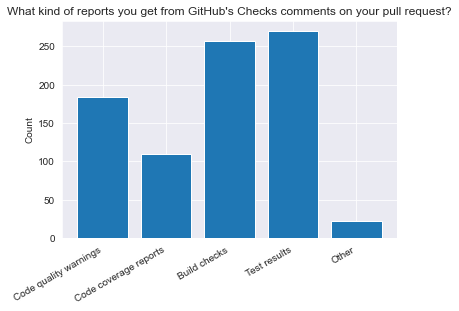

Number of not-answered: 153
Number of answered: 318


In [45]:
cr_checklist = ['Code quality warnings', 'Code coverage reports', 'Build checks', 'Test results', 'Other']
counts = [df['PR_checks_type_quality'].sum(), df['PR_checks_type_coverage'].sum(), df['PR_checks_type_build'].sum(), df['PR_checks_type_test'].sum(), df['PR_checks_type_other_choice'].sum()]
fig, ax = plt.subplots()
ax.bar(cr_checklist, counts)
ax.set_ylabel('Count')
ax.set_title("What kind of reports you get from GitHub's Checks comments on your pull request?")
plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.PR_checks_type.isna().sum())
print("Number of answered:", df.shape[0] - df.PR_checks_type.isna().sum())

In [46]:
print(df[contributors]['PR_checks_type'].isna().sum())
print(count_contributors - df[contributors]['PR_checks_type'].isna().sum())
# print(df[contributors].PR_checks_type.value_counts())
print('-----')
print(df[maintainers]['PR_checks_type'].isna().sum())
print(count_maintainers - df[maintainers]['PR_checks_type'].isna().sum())
# print(df[maintainers].PR_checks_type.value_counts())

62
125
-----
91
193


In [47]:
df[~df["PR_checks_type_other"].isna()][['PR_checks_type_other']].to_csv("manual_data_inspection/PR_checks_type_other.csv")

In [48]:
df[~df["how_CR_helps"].isna()][['how_CR_helps']].to_csv("manual_data_inspection/how_CR_helps.csv")

In [49]:
print(df[contributors]['how_CR_helps'].isna().sum())
print(count_contributors - df[contributors]['how_CR_helps'].isna().sum())
# print(df[contributors].PR_checks_type.value_counts())
print('-----')
print(df[maintainers]['how_CR_helps'].isna().sum())
print(count_maintainers - df[maintainers]['how_CR_helps'].isna().sum())
# print(df[maintainers].PR_checks_type.value_counts())

66
121
-----
108
176


In [50]:
data = pd.read_excel('manual_data_inspection/how_CR_helps_coding.xlsx')
invalid_indexes = data[data['invalid'] == 1]['Column1'].astype(int).tolist()
# zero_indexes = data[data['no'] == 1]['Column1'].astype(int).tolist()
# donno_indexes = data[data["idk - unsure"] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])
print('---')
# print(df[df.index.isin(zero_indexes) & (contributors)].shape[0])
# print(df[df.index.isin(zero_indexes) & (maintainers)].shape[0])
# print('---')
# print(df[df.index.isin(donno_indexes) & (contributors)].shape[0])
# print(df[df.index.isin(donno_indexes) & (maintainers)].shape[0])

7
23
---


In [51]:
print("Number of not-answered:", df.how_CR_helps.isna().sum())
print("Number of answered:", df.shape[0] - df.how_CR_helps.isna().sum())

Number of not-answered: 174
Number of answered: 297


In [52]:
print("Number of contributors not-answered:", df[contributors].how_CR_helps.isna().sum())
print("Percentage of contributors not-answered:", df[contributors].how_CR_helps.isna().sum() * 100 / count_contributors)
print("Number of maintainers not-answered:", df[maintainers].how_CR_helps.isna().sum())
print("Percentage of maintainers not-answered:", df[maintainers].how_CR_helps.isna().sum() * 100 / count_maintainers)

Number of contributors not-answered: 66
Percentage of contributors not-answered: 35.294117647058826
Number of maintainers not-answered: 108
Percentage of maintainers not-answered: 38.028169014084504
